# 4.Ecuaciones ODE usando la función `odeint`

Primero, importaremos algunas librerías que necesitaremos más adelante y nombraremos las funciones como se muestra a continuación:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

La función `odeint`, la podemos encontrar en `integrate` submodulo del paquete de `scipy`, esta nos ayudará a trabajar ecuaciones diferenciales de la siguiente forma:
$$
\newcommand{\yy}{\mathbf{y}}
\newcommand{\ff}{\mathbf{f}}
\frac{\mathrm{d} \yy}{\mathrm{d}t} = \ff(\yy, t),
$$Donde $\yy$ es un vector en $\mathbb{R}^n$, 
$$
\dot{\yy} =  \ff(\yy, t).
$$
Es decir, proporcionará una solución numérica de acuerdo al valor inicial dado para la ecuación diferencial, junto con una condición inicial
$$
\yy(t = t_0) = \yy_0,
$$
devolviendo la curva solución (o trayectoria) $\yy(t)$ en función del tiempo $t$, dentro de un cierto rango (finito!) de valores de $t$.

Ecribiendo $\yy = (y_1, \ldots, y_n)$, tendremos un sistema con la siguiente forma
\begin{align}
\dot{y_1} &= f_1(y_1, \ldots, y_n, t) \\
\dot{y_2} &= f_2(y_1, \ldots, y_n, t) \\
&\ldots \\
\dot{y_n} &= f_n(y_1, \ldots, y_n, t)
\end{align}

Hay que tener en cuenta que cualquier sistema de ecuaciónes diferenciales ordinarias pueden escribirse de esta forma, es decir, definiendo nuevas variables para representar derivadas de orden superior,  
icnorporandolas al vector $\yy$ de variables.

Para usar `odeint`, debemos definir  la función de Python `f` que implementa la función matemática $\ff$. Se toma un vector `y` y un tiempo `t`,
y esta devuelve el nuevo vector `f(y,t)`.

## 1D ecuaciones

El caso más simple es cuando la dimensión es $n=1$. Por ejemplo, podríamos resolver la EDO
$
\dot{y} = ay,
$
cuya solución exacta es, por supuesto, $y(t) = y_0 \exp(a t)$.

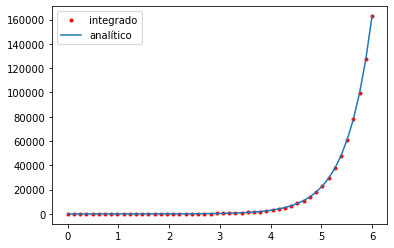

In [2]:
a = 2.0
def f(y, t):
    return a*y
times = np.linspace(0,6)
y0 = 1.0
y_output = odeint(f, y0, times)
y_exact = y0*np.exp(a*times)
plt.plot(times, y_output, 'r.', label='integrado')
plt.plot(times, y_exact, label='analítico')
plt.legend()
plt.show()


# Ejemplo, Cálculo de la conversión X en un reactor con caída de presión

En este caso tenemos dos variables que integrar (la conversión $X$ y la presión $y$), por lo que nuestra función debe aceptar y devolver un vector. Integraremos en relación al peso del catalizador $W$, y no de acuerdo a la variable tiempo $t$.
Por Consiguiente las ecuaciones diferenciales se verán así:

$$\frac{\mathrm{d} X}{\mathrm{d} W} = \frac{-r_A'}{F_{A0}}$$
$$\frac{\mathrm{d} y}{\mathrm{d} W} = -\alpha \frac{(1+\epsilon X)}{2y}$$


### Datos del problema:


| Datos dados        | Valor     | 
|--------------------|-----------|
| **epsilon**        | -0.15     | 
| **K1**             |  0.0266   | 
| **Fa0**            |  1.08     | 
| **alpha**          |  0.0166   |

In [3]:
def dYvecdV(Yvec,W):
    X, y = Yvec # valores del vector Y en tres variables
    # Datos del problema (ecuaciones explícitas)
    epsilon = -0.15
    kprime = 0.0266
    Fa0 = 1.08
    alpha = 0.0166
    raprime = -1*kprime*(1-X)/(1+epsilon*X) * y
    f = (1+epsilon*X)/y # razón de v / v0
    # ecuaciones diferenciales
    dXdW = -raprime / Fa0
    dydW = -1*alpha * (1 + epsilon * X)/ (2*y) 
    return [dXdW, dydW]  # tres ecuaciones diferenciales en el vector dYvecdV 

Etableceremos aquello que se desea integrar. En este caso es Peso no Tiempo

In [4]:
W_output = np.linspace(0, 27., num=50) #Rango para el peso de catalizador dentro reactor

Establecer las condiciones iniciales, como vector de dos variables

In [5]:
Y0 = [0., 1.] # valore iniciales para las variables independientes X (conversión) y y (presión)

Realizar la integración y obtener los resultados.

In [6]:
Y_result = odeint(dYvecdV, Y0, W_output) # integración
X, y = Y_result.T 
print(Y_result)

[[0.         1.        ]
 [0.01346265 0.99542067]
 [0.02670978 0.99082943]
 [0.03974456 0.98622596]
 [0.05257003 0.98160993]
 [0.06518924 0.97698103]
 [0.07760519 0.97233892]
 [0.08982084 0.96768327]
 [0.10183914 0.96301375]
 [0.11366297 0.95833001]
 [0.12529522 0.9536317 ]
 [0.1367387  0.94891847]
 [0.14799621 0.94418996]
 [0.15907051 0.9394458 ]
 [0.16996433 0.93468562]
 [0.18068035 0.92990905]
 [0.19122123 0.92511569]
 [0.2015896  0.92030517]
 [0.21178804 0.91547707]
 [0.22181909 0.91063099]
 [0.23168528 0.90576652]
 [0.24138908 0.90088323]
 [0.25093295 0.8959807 ]
 [0.2603193  0.89105848]
 [0.26955051 0.88611613]
 [0.27862893 0.88115318]
 [0.28755685 0.87616917]
 [0.29633658 0.87116361]
 [0.30497034 0.86613603]
 [0.31346035 0.86108591]
 [0.32180879 0.85601274]
 [0.3300178  0.85091601]
 [0.3380895  0.84579516]
 [0.34602596 0.84064965]
 [0.35382924 0.83547891]
 [0.36150134 0.83028237]
 [0.36904426 0.82505943]
 [0.37645993 0.81980946]
 [0.38375029 0.81453186]
 [0.39091721 0.80922596]


Graficar lo resultados

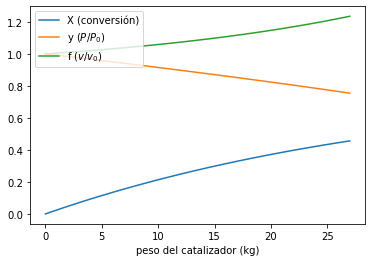

In [7]:
epsilon = -0.15
f = (1+epsilon*X)/y # Flujo volumétrico

plt.plot(W_output, X, label='X (conversión)')
plt.plot(W_output, y, label='y ($P/P_0$)')
plt.plot(W_output, f, label='f ($v/v_0$)')
plt.legend(loc='upper left')
plt.xlabel('peso del catalizador (kg)')

plt.show()